In [2]:
import numpy as np
import pandas as pd

import json

import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import torch.utils.data
from torch.nn import CrossEntropyLoss

from utils.torchutils import get_device

pio.templates.default = "simple_white"
# pio.renderers.default = "plotly_mimetype"
pio.renderers.default = "png"

from experiments.datasets.imbalancing import split_with_label_distribution_skew, train_test_split
from experiments.datasets.cifar import CIFAR10
from experiments.datasets.mnist import MNIST

from models.mnist import CNN
from experiments.datasets.base import create_dataloader

from torch.optim import SGD, AdamW

In [3]:
BASEDIR = "../output"

N_CLIENTS = 100
GAMMA = 0.8
BATCH_SIZE = 64
LR = 2e-3
EPOCHS = 5
ROUNDS = 10
ALPHA = 1
MU = 0
MODEL = CNN

In [4]:
dataset = MNIST("/tmp/data").train_data()

client_datasets = split_with_label_distribution_skew(dataset, ALPHA, N_CLIENTS)
client_train_datasets, client_test_datasets = train_test_split(client_datasets)

client_train_dataloaders = [create_dataloader(ds, BATCH_SIZE) for ds in client_train_datasets]
client_test_dataloaders = [create_dataloader(ds, BATCH_SIZE) for ds in client_test_datasets]

100%|██████████| 9912422/9912422 [00:01<00:00, 7465005.08it/s]


Extracting /tmp/data/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 6777580.36it/s]

Extracting /tmp/data/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 6695333.71it/s]


Extracting /tmp/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1290511.36it/s]


Extracting /tmp/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/data/MNIST/raw


In [5]:
def create_optimizer(params):
    # return SGD(params, LR)
    return AdamW(params, LR)

In [6]:
from federated_learning.fedprox_new import FedProx

fedprox = FedProx(
    model_class=MODEL,
    loss=CrossEntropyLoss(),
    optimizer=create_optimizer,
    rounds=ROUNDS,
    epochs=EPOCHS,
    gamma=GAMMA,
    mu=MU,
    device=get_device()
)

results = fedprox.fit(client_train_dataloaders, client_test_dataloaders)

Using device 'cuda'


Round:   0%|          | 0/10 [00:00<?, ?it/s]

Client:   0%|          | 0/100 [00:00<?, ?it/s]

/home/lukas/Work/masterthesis-clustered-fl/.venv/lib/python3.11/site-packages/torch/overrides.py:110: UserWarning:

'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'

/home/lukas/Work/masterthesis-clustered-fl/.venv/lib/python3.11/site-packages/torch/overrides.py:111: UserWarning:

'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'

/home/lukas/Work/masterthesis-clustered-fl/.venv/lib/python3.11/site-packages/torch/overrides.py:117: UserWarning:

'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'

/home/lukas/Work/masterthesis-clustered-fl/.venv/lib/python3.11/site-packages/torch/overrides.py:118: UserWarning:

'has_mkldnn' is deprecated, please use 'torch.backends.mkldnn.is_available()'



Client:   0%|          | 0/100 [00:00<?, ?it/s]

Client:   0%|          | 0/100 [00:00<?, ?it/s]

Client:   0%|          | 0/100 [00:00<?, ?it/s]

Client:   0%|          | 0/100 [00:00<?, ?it/s]

Client:   0%|          | 0/100 [00:00<?, ?it/s]

Client:   0%|          | 0/100 [00:00<?, ?it/s]

Client:   0%|          | 0/100 [00:00<?, ?it/s]

Client:   0%|          | 0/100 [00:00<?, ?it/s]

Client:   0%|          | 0/100 [00:00<?, ?it/s]

In [7]:
df = results.as_dataframe()

In [8]:
df

,round,client0_train_loss,client0_test_loss,client0_test_accuracy,client1_train_loss,client1_test_loss,client1_test_accuracy,client2_train_loss,client2_test_loss,client2_test_accuracy,...,client97_test_accuracy,client98_train_loss,client98_test_loss,client98_test_accuracy,client99_train_loss,client99_test_loss,client99_test_accuracy,average_train_loss,average_test_loss,average_test_accuracy
0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.380257,1.044666,0.791667,...,1.000000,0.026686,0.064334,0.973684,NaN,NaN,NaN,0.102329,0.131707,0.966962
1,2,NaN,NaN,NaN,NaN,NaN,NaN,0.080877,0.132494,0.958333,...,1.000000,0.002290,0.088086,0.984211,NaN,NaN,NaN,0.050255,0.095552,0.979825
2,3,NaN,NaN,NaN,NaN,NaN,NaN,0.061970,0.177159,0.944444,...,0.991379,0.000682,0.080422,0.984211,NaN,NaN,NaN,0.047163,0.115819,0.978449
3,4,NaN,NaN,NaN,0.052040,0.109235,0.971154,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,0.038954,0.002540,1.000000,0.070067,0.199398,0.976867
4,5,0.247062,0.100669,0.955882,0.072820,0.232729,0.951923,0.119503,0.999722,0.944444,...,1.000000,0.014187,0.044482,0.984211,NaN,NaN,NaN,0.096054,0.140347,0.976778
5,6,NaN,NaN,NaN,0.072961,0.149659,0.971154,0.070301,0.287918,0.958333,...,NaN,NaN,NaN,NaN,0.009796,0.021089,0.984615,0.054086,0.127217,0.975446
6,7,NaN,NaN,NaN,NaN,NaN,NaN,0.121815,0.251511,0.916667,...,1.000000,NaN,NaN,NaN,0.004219,0.011391,0.992308,0.074775,0.133159,0.977233
7,8,0.290256,0.538337,0.955882,0.073771,0.127897,0.971154,0.135762,0.102079,0.944444,...,1.000000,0.039328,0.032014,0.984211,0.000269,0.005158,0.992308,0.123848,0.163579,0.975407
8,9,0.464475,0.739509,0.955882,0.118969,0.274454,0.951923,NaN,NaN,NaN,...,0.982759,NaN,NaN,NaN,NaN,NaN,NaN,0.231698,0.203736,0.970567
9,10,0.091420,0.170467,0.911765,NaN,NaN,NaN,0.044588,0.118277,0.958333,...,0.991379,0.003940,0.075442,0.984211,NaN,NaN,NaN,0.062963,0.150644,0.973854


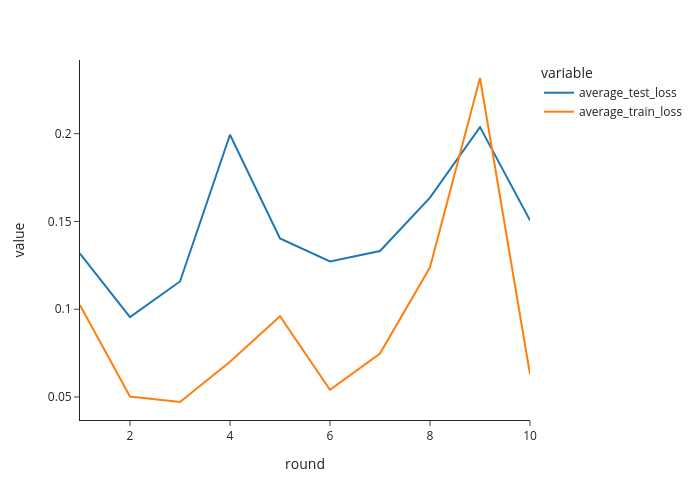

In [9]:
px.line(df, x="round", y=["average_test_loss", "average_train_loss"])

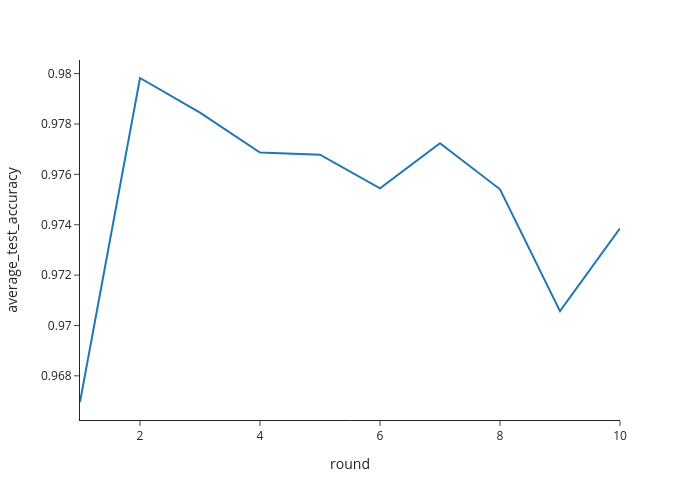

In [10]:
px.line(df, x="round", y="average_test_accuracy")

In [11]:
def starts_with(df: pd.DataFrame, s: str) -> list[str]:
    return list(filter(lambda c: c.startswith(s), df.columns))

def ends_with(df: pd.DataFrame, s: str) -> list[str]:
    return list(filter(lambda c: c.endswith(s), df.columns))

In [14]:
@np.vectorize
def get_client(s: str) -> str:
    return s.split(r"_")[0]

In [15]:
rounds = df["round"]
dfc = df.drop(columns=starts_with(df, "average"))
dfc = dfc.filter(ends_with(dfc, "_accuracy"))
dfc = dfc.melt(value_vars=starts_with(dfc, "client"), value_name="accuracy", var_name="client")
dfc["round"] = rounds
dfc.set_index("round", inplace=True)
dfc["client"] = get_client(dfc["client"])
dfc

,client,accuracy
round,,
1.0,client0,NaN
2.0,client0,NaN
3.0,client0,NaN
4.0,client0,NaN
5.0,client0,0.955882
...,...,...
NaN,client99,0.984615
NaN,client99,0.992308
NaN,client99,0.992308
